# ***ROCK PAPER SCISSOR***

## **MODULE**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import glob
from google.colab import drive
import zipfile, os, shutil
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **CONNECT TO GOOGLE DRIVE**

In [ ]:
### mount Google Drive ### 
drive.mount('/content/gdrive')
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


'/content'

In [ ]:
# unzip
dataset = '/content/gdrive/My Drive/PROJECT/RSP/rps.zip'
dst_path = '/content/rps'
dst_file = os.path.join(dst_path, 'rps.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)


# copy zip file
shutil.copy(dataset, dst_file)
  
with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

## **Preprocessing Dataset**

In [ ]:
train_rock_dir = os.path.join(dst_path, '/content/rps/rps/train/rps/rock/')
train_paper_dir = os.path.join(dst_path, '/content/rps/rps/train/rps/scissors/')
train_scissor_dir = os.path.join(dst_path, '/content/rps/rps/train/rps/paper/')

print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissor images:', len(os.listdir(train_scissor_dir)))

valid_rock_dir = os.path.join(dst_path, '/content/rps/rps/valid/rps/rock/')
valid_paper_dir = os.path.join(dst_path, '/content/rps/rps/valid/rps/scissors/')
valid_scissor_dir = os.path.join(dst_path, '/content/rps/rps/valid/rps/paper/')

print('total valid rock images:', len(os.listdir(valid_rock_dir)))
print('total valid paper images:', len(os.listdir(valid_paper_dir)))
print('total valid scissor images:', len(os.listdir(valid_scissor_dir)))

test_rock_dir = os.path.join(dst_path, '/content/rps/rps/test/rps/rock/')
test_paper_dir = os.path.join(dst_path, '/content/rps/rps/test/rps/scissor/')
test_scissor_dir = os.path.join(dst_path, '/content/rps/rps/test/rps/paper/')

print('total test rock images:', len(os.listdir(test_rock_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test scissor images:', len(os.listdir(test_scissor_dir)))

total training rock images: 1500
total training paper images: 1500
total training scissor images: 1500
total valid rock images: 200
total valid paper images: 200
total valid scissor images: 200
total test rock images: 1324
total test paper images: 1246
total test scissor images: 1346


In [ ]:
train_dir = os.path.join('/content/rps/rps/train/rps')
valid_dir = os.path.join('/content/rps/rps/valid/rps')
test_dir = os.path.join('/content/rps/rps/test/rps')

train_datagen = ImageDataGenerator(rescale=1./255,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(28,28), class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(28,28), class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(28,28),  class_mode='categorical')

Found 4500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 3916 images belonging to 3 classes.


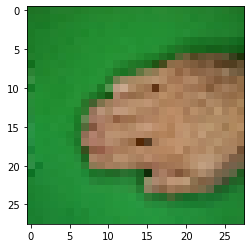

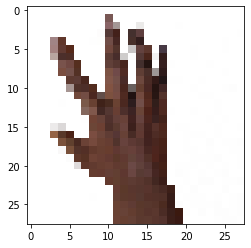

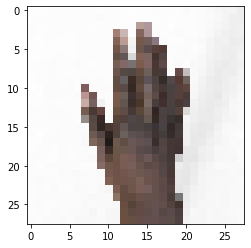

In [ ]:
path='/content/rps/rps/train/rps/paper/'

fnames = os.listdir(path)

plt.figure()

i=0
for i in range(0,3): 
  plt.figure(i)
  img_path = fnames[i]
  img = image.load_img(path + '/' +img_path, target_size=(28,28))
  plt.imshow(img) 
  i += 1

## **NETWORK**

In [ ]:
model=keras.models.Sequential()
#1.input_shape = 입력이미지의 형태 
#2-1)Con2D = 얼마나 다양한 이미지의 특징을 살펴보 것인가?
#2-2)이미지가 다양할 수록 많은 특성을 파악하도록 함
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
#3. Dense : 분류기 알고리즘을 얼마나 복잡하게 할 것인가?복잡할 수록 숫자를 늘리는게 대부분
model.add(keras.layers.Dense(32, activation='relu'))
#4. 최종 분류기의 class의 수이므로, 우리는 0~9, 총 10개의 class 구분 
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

In [ ]:
import time

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

start = time.time()
history=model.fit_generator(train_generator,
                            steps_per_epoch=50,
                            epochs=20,
                            validation_data=valid_generator,
                            validation_steps=10)
elapsed = time.time() - start

print('Elapsed time: %.4f' % elapsed)

Epoch 1/20
50/50 [==============================] - 6s 123ms/step - loss: 1.0339 - accuracy: 0.5194 - val_loss: 0.9782 - val_accuracy: 0.5094
Epoch 2/20
50/50 [==============================] - 6s 120ms/step - loss: 0.6852 - accuracy: 0.7500 - val_loss: 0.7172 - val_accuracy: 0.7125
Epoch 3/20
50/50 [==============================] - 6s 121ms/step - loss: 0.4093 - accuracy: 0.8631 - val_loss: 0.6077 - val_accuracy: 0.7125
Epoch 4/20
50/50 [==============================] - 6s 122ms/step - loss: 0.2916 - accuracy: 0.8963 - val_loss: 0.4601 - val_accuracy: 0.7688
Epoch 5/20
50/50 [==============================] - 6s 119ms/step - loss: 0.2206 - accuracy: 0.9232 - val_loss: 0.5047 - val_accuracy: 0.7656
Epoch 6/20
50/50 [==============================] - 6s 121ms/step - loss: 0.1700 - accuracy: 0.9402 - val_loss: 0.4275 - val_accuracy: 0.8062
Epoch 7/20
50/50 [==============================] - 6s 119ms/step - loss: 0.1818 - accuracy: 0.9362 - val_loss: 0.4151 - val_accuracy: 0.8188
Epoch 

## **PLOT - PER EPOCH**

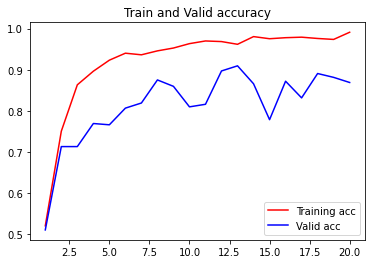

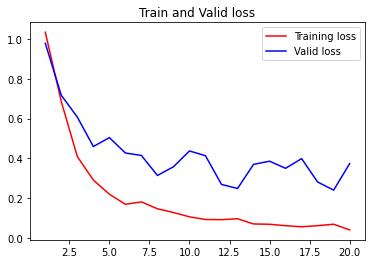

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Valid acc') 
plt.title('Train and Valid accuracy') 
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Valid loss') 
plt.title('Train and Valid loss') 
plt.legend()

plt.show()

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

start = time.time()
history2=model.fit_generator(train_generator,
                            steps_per_epoch=50,
                            epochs=7,
                            validation_data=valid_generator,
                            validation_steps=10)
elapsed = time.time() - start

print('Elapsed time: %.4f' % elapsed)

Epoch 1/7
50/50 [==============================] - 6s 121ms/step - loss: 0.0282 - accuracy: 0.9894 - val_loss: 0.6044 - val_accuracy: 0.8000
Epoch 2/7
50/50 [==============================] - 6s 120ms/step - loss: 0.0207 - accuracy: 0.9943 - val_loss: 0.3361 - val_accuracy: 0.8844
Epoch 3/7
50/50 [==============================] - 6s 120ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.2388 - val_accuracy: 0.9062
Epoch 4/7
50/50 [==============================] - 6s 122ms/step - loss: 0.0296 - accuracy: 0.9931 - val_loss: 0.9708 - val_accuracy: 0.7969
Epoch 5/7
50/50 [==============================] - 6s 122ms/step - loss: 0.0205 - accuracy: 0.9956 - val_loss: 0.6189 - val_accuracy: 0.8469
Epoch 6/7
50/50 [==============================] - 6s 122ms/step - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.6664 - val_accuracy: 0.8313
Epoch 7/7
50/50 [==============================] - 6s 119ms/step - loss: 0.0234 - accuracy: 0.9918 - val_loss: 0.5466 - val_accuracy: 0.8906
Elapsed time:

## **CONFUSIONMATRIX - TEST**

### ***def plot_cm***

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### ***plot_cm***

In [ ]:
from mlxtend.evaluate import confusion_matrix
from tensorflow.keras.utils import to_categorical

classes=to_categorical(test_generator.classes)
score=model.predict(test_generator)

cm = confusion_matrix(np.argmax(classes, axis=1),np.argmax(score.round(), axis=1),binary=False)

cm

array([[491, 490, 365],
       [531, 446, 347],
       [500, 418, 328]])

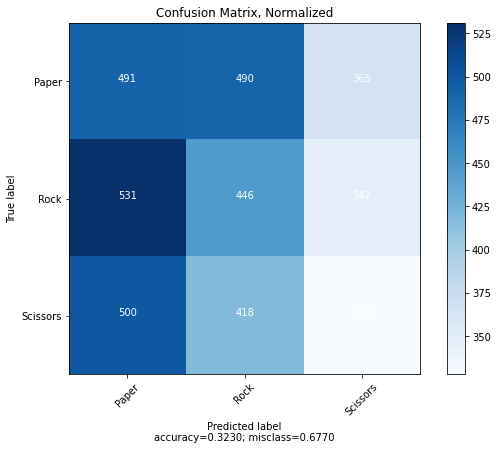

In [ ]:
plot_confusion_matrix(cm,normalize=False, target_names=['Paper','Rock','Scissors'],title= "Confusion Matrix, Normalized")

개선점

*   train,valid,test 모두 제대로 분배되지 않았다는 점을 볼 수 있다.
*   reshape를 너무 작은 단위로 진행을 하였기 때문에, 사진들의 특징을 가져오는데 문제가 있다